# Logistic Regression With Bank Data

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Load the dataset

In [17]:
url = "/content/sample_data/bank-full.csv"
data = pd.read_csv(url, sep=";")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Explore the Data

In [18]:
print(data['y'].value_counts())
data.info()

no     39922
yes     5289
Name: y, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Encode categorical variables

In [20]:
data_encoded = pd.get_dummies(
    data,
    columns=[
        "job",
        "marital",
        "education",
        "default",
        "housing",
        "loan",
        "contact",
        "month",
        "poutcome",
    ],
    drop_first=True,
)

## Pair Plot for Feature Relationships

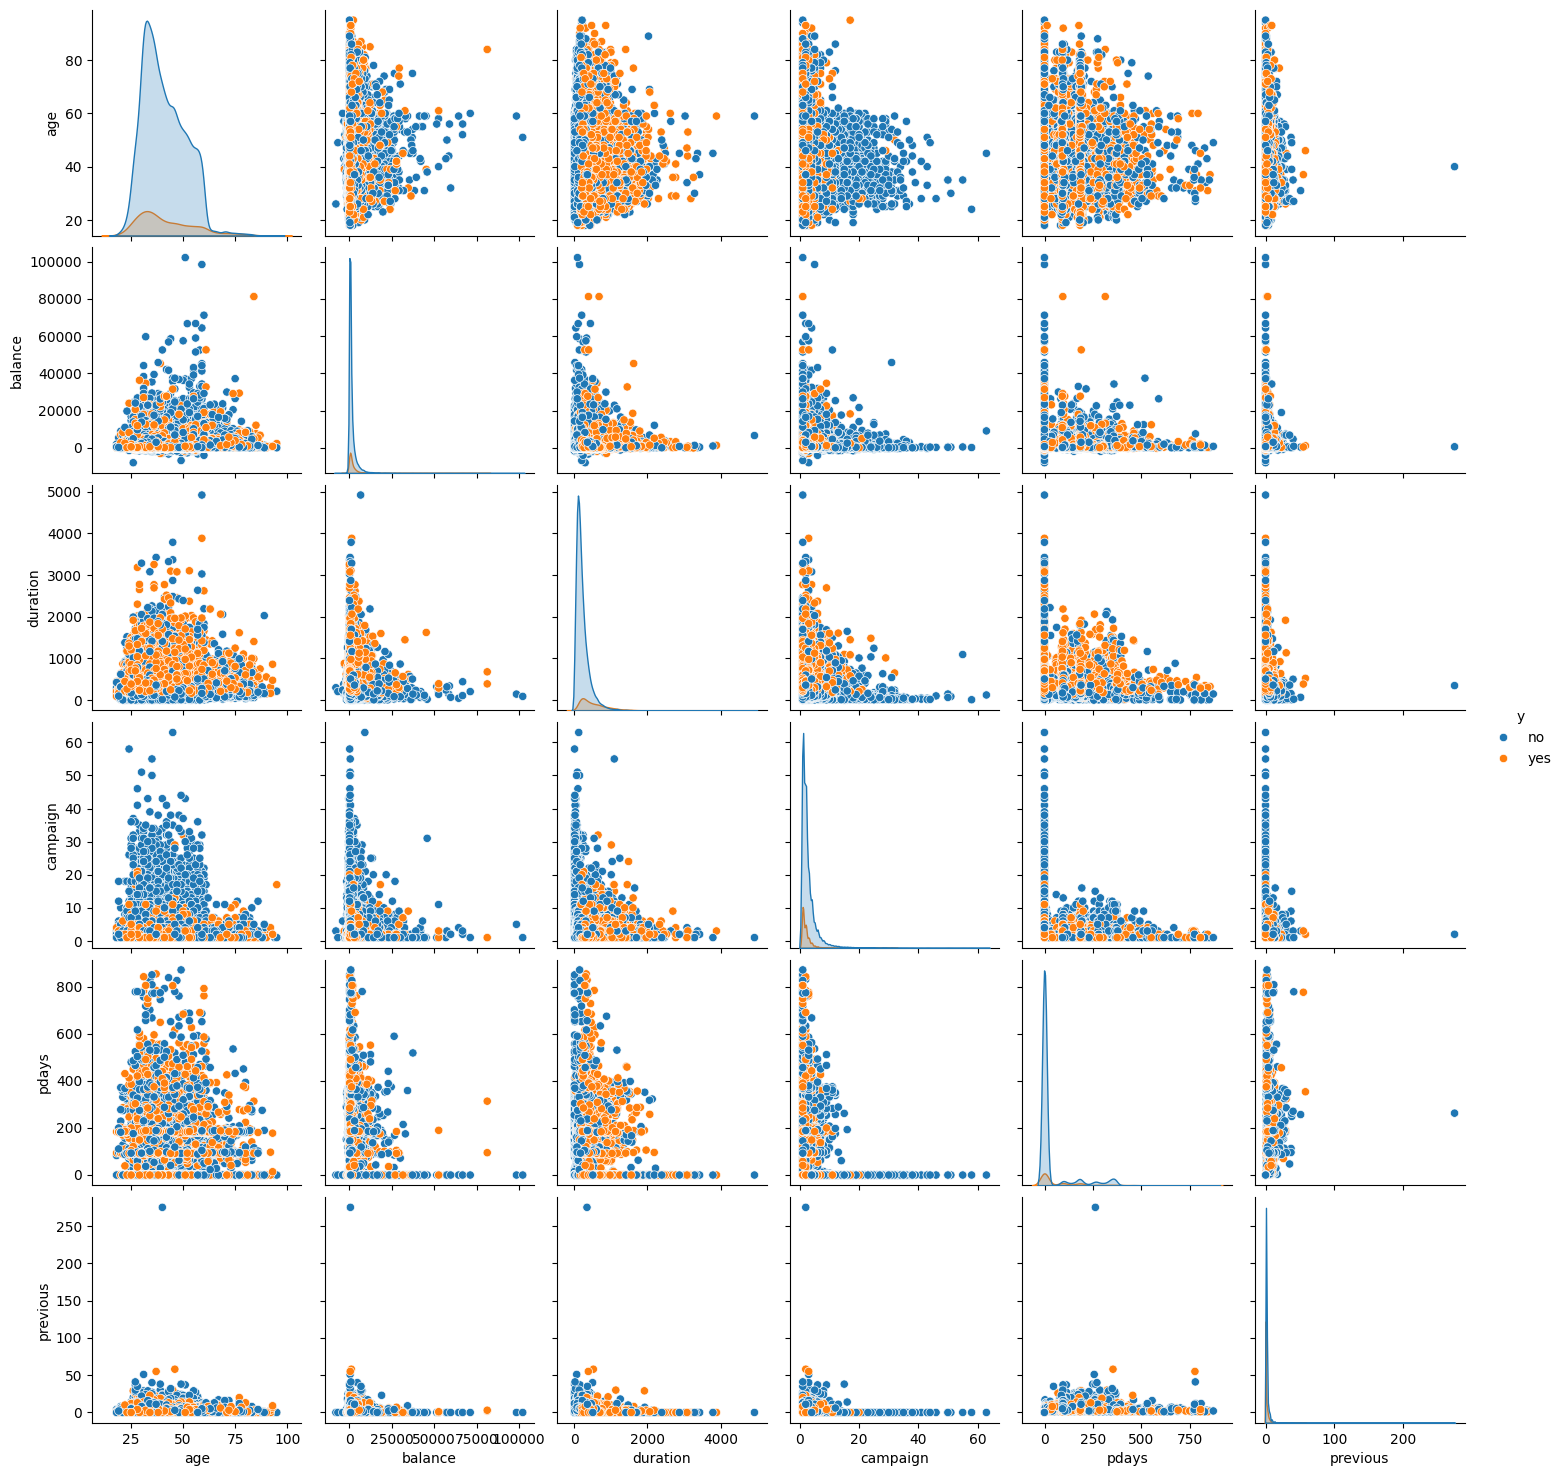

In [21]:
sns.pairplot(
    data_encoded[["age", "balance", "duration", "campaign", "pdays", "previous", "y"]],
    hue="y",
    diag_kind="kde",
)
plt.show()

## Feature scaling

In [22]:
scaler = StandardScaler()
data_encoded[
    ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
] = scaler.fit_transform(
    data_encoded[["age", "balance", "day", "duration", "campaign", "pdays", "previous"]]
)

## Convert 'no' and 'yes' to 0 and 1 in the target variable

In [23]:
data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})

## Split the data into training and testing sets

In [24]:
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

## Build and train the Logistic Regression model with hyperparameter tuning

In [25]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_logreg_model = grid_search.best_estimator_

## Feature Importance Bar Plot

<ipython-input-26-ad15f141935b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted, palette='viridis')


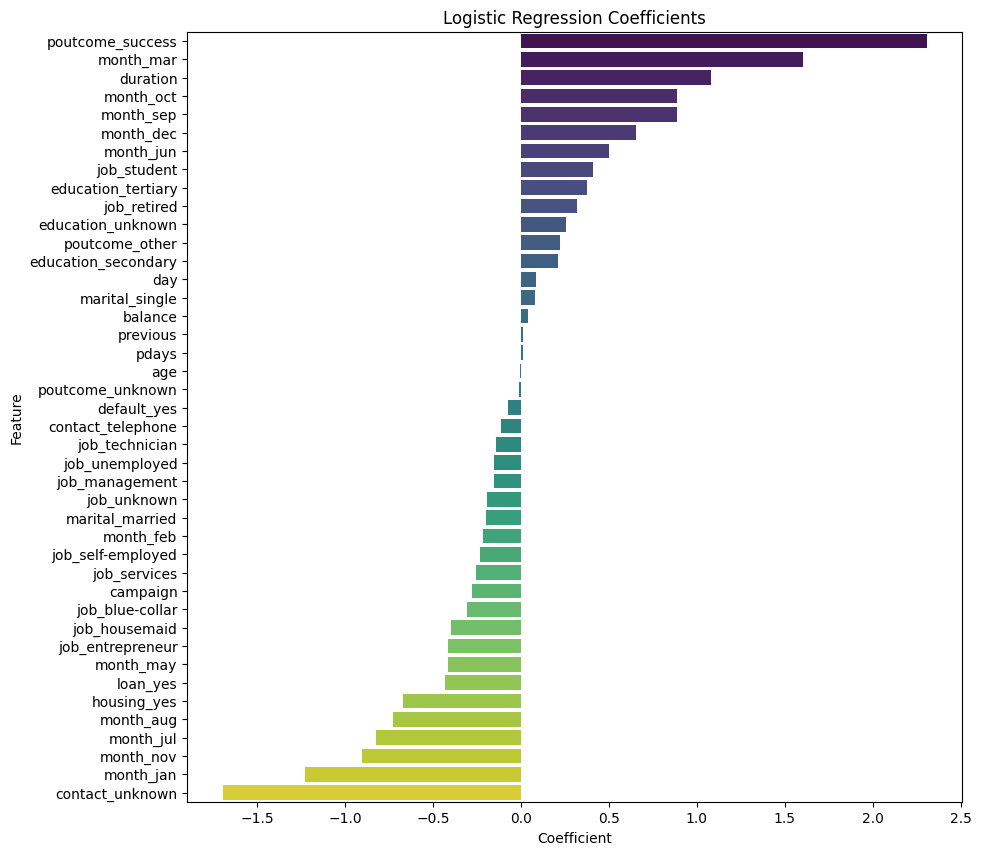

In [26]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_logreg_model.coef_[0]})
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted, palette='viridis')
plt.title("Logistic Regression Coefficients")
plt.show()

## Test the model

In [27]:
y_pred = best_logreg_model.predict(X_test)

## Evaluate the model

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8005
           1       0.65      0.35      0.46      1038

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



## Confusion Matrix

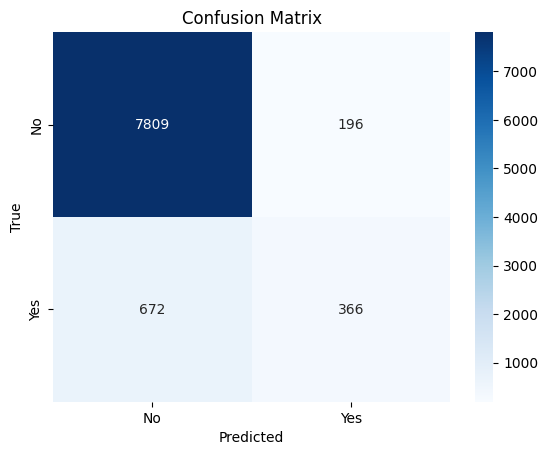

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No", "Yes"],
    yticklabels=["No", "Yes"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## ROC Curve

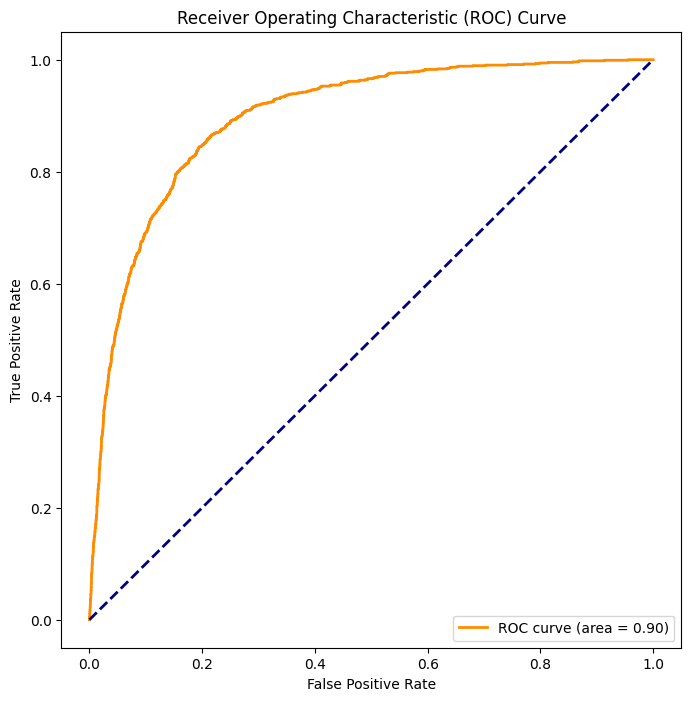

In [30]:
y_prob = best_logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = {:.2f})".format(roc_auc),
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()